In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
file = r'/gdrive/My Drive/Colab Notebooks/Human activity recognition/train.csv'
df = pd.read_csv(file)
df.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
5166,0.270125,-0.018415,-0.102396,-0.993925,-0.995360,-0.993107,-0.994907,-0.995618,-0.994375,-0.937765,...,-0.734213,0.010395,-0.167774,0.209969,0.296732,0.463608,-0.699960,-0.283754,25,LAYING
3537,0.251108,-0.010372,-0.070876,-0.328020,-0.047256,-0.394642,-0.381338,-0.079612,-0.417051,-0.009709,...,0.115495,0.398174,0.682998,0.547770,0.052547,-0.681887,0.289267,0.128235,17,WALKING
3156,0.268392,-0.012719,-0.107179,-0.983543,-0.989400,-0.997673,-0.984007,-0.990167,-0.998047,-0.932555,...,-0.848431,0.202478,0.180192,0.333043,-0.384520,0.461280,0.408140,-0.787517,16,LAYING
4113,0.298077,0.022145,-0.092031,-0.404397,-0.149856,-0.276738,-0.447054,-0.133753,-0.279550,-0.258712,...,-0.572961,0.135324,-0.256074,-0.400072,0.865773,-0.576933,0.338641,0.183935,21,WALKING
4593,0.273901,-0.014043,-0.097335,-0.992822,-0.978207,-0.925009,-0.993096,-0.979272,-0.914054,-0.936969,...,-0.786801,0.014297,-0.208840,-0.216869,0.109104,-0.823046,0.032706,-0.092752,22,SITTING


In [ ]:
df.shape

(7352, 563)

In [ ]:
df.isna().sum()

,0
tBodyAcc-mean()-X,0
tBodyAcc-mean()-Y,0
tBodyAcc-mean()-Z,0
tBodyAcc-std()-X,0
tBodyAcc-std()-Y,0
...,...
"angle(X,gravityMean)",0
"angle(Y,gravityMean)",0
"angle(Z,gravityMean)",0
subject,0


In [ ]:
df['Activity'].value_counts()

,count
Activity,
LAYING,1407
STANDING,1374
SITTING,1286
WALKING,1226
WALKING_UPSTAIRS,1073
WALKING_DOWNSTAIRS,986


In [ ]:
df.duplicated().any()

False

In [ ]:
df.T.duplicated().any()

True

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

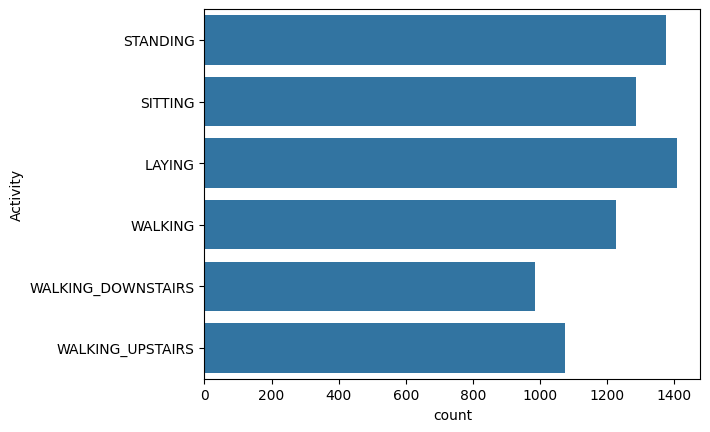

In [ ]:
sns.countplot(df['Activity'])
plt.show()

In [ ]:
X = df.drop('Activity',axis=1)
Y = df['Activity']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit_transform(Y)

array([2, 2, 2, ..., 5, 5, 5])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Feature Selection**

Mainly of 3 types

1.   Filter Methods
2.   Wrapped methods
3.   Embedded methods

#### Filter Methods

  Features are selected on the basis of statistics measures. This method does not depend on the learning algorithm and chooses the features as a pre-processing step.


#### Wrapper Methods

  Features are selected by considering it as a search problem, in which different combinations are made, evaluated and compared with other combinations.It trains the algorithm b using the subset of features iteratively.

#### Embedded methods

It combines the advantages of both filter and wrapper methods by considering the interaction of features along with low computational cost. More accurate than filter methods.

Applying hybrid method of feature classification which is applying two different methods one after other for better results

In [ ]:
!pip install nbimporter

In [ ]:
import nbimporter
import sys
sys.path.append('/gdrive/My Drive/Colab Notebooks/Human activity recognition/')

In [ ]:
import utils

In [ ]:
from utils import RemoveDuplicateColumns
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipeline = Pipeline([
    ('remove_duplicates', RemoveDuplicateColumns()),  # Remove duplicate columns
    ('selector', SelectKBest(score_func=f_classif, k=300)),              # Select top k features
    ('rfe', RFE(estimator=RandomForestClassifier(),n_features_to_select=250)), # Recursive Feature Elimination
    ('rfc', RandomForestClassifier())                 # Random Forest Classifier
])

In [ ]:
df.shape

(7352, 563)

In [ ]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('remove_duplicates', RemoveDuplicateColumns()),
                ('selector', SelectKBest(k=300)),
                ('rfe',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=250)),
                ('rfc', RandomForestClassifier())])

In [ ]:
from sklearn import set_config
from sklearn.utils import estimator_html_repr
set_config(display='diagram')
plt.show(pipeline)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
score = accuracy_score(Y_test, y_pred)

In [ ]:
print(score)

0.9850441876274643


In [ ]:
import joblib

In [ ]:
joblib.dump(pipeline, '/gdrive/My Drive/Colab Notebooks/Human activity recognition/pipeline.pkl')

['/gdrive/My Drive/Colab Notebooks/Human activity recognition/pipeline.pkl']